In [1]:
import torch as torch
from network.metric.accuracy import acc_srcnn_tiny_radar
from network.models.classifiers.tiny_radar import TinyRadarNN
from network.models.sr_classifier.SRCnnTinyRadar import CombinedSRCNNClassifier
from network.models.super_resolution.drln import DRLN
from network.models.super_resolution.srcnn import SRCnn
from network.runner import Runner
from utils.utils_paths import get_time_in_string
from utils.utils_images import Normalization

import numpy as np

In [2]:
def pixel_range(img, desc):
    min_val = img.min()
    max_val = img.max()
    print(desc + f" pixel range: [{min_val} , {max_val}]")

def plot_img(img, desc):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.title(desc)
    plt.show()

def nom_img(imgs):
    for i in range(imgs.shape[0]):
        for j in range(imgs.shape[1]):
            for k in range(imgs.shape[2]):
                img = imgs[i,j,k,:,:]
                img_max = img.max()
                imgs[i,j,k,:,:] = 2*(img/img_max)-1
    return imgs




SRCNN - TinyRadarNN results - 

In [3]:
from data_loader.tiny_radar_loader import tiny_radar_for_sr_classifier_on_disk


gestures = [
        "PinchIndex",
        "PinchPinky",
        "FingerSlider",
        "FingerRub",
        "SlowSwipeRL",
        "FastSwipeRL",
        "Push",
        "Pull",
        "PalmTilt",
        "Circle",
        "PalmHold",
        "NoHand",
    ]
persons = 2
people = list(range(1, persons, 1))
data_dir = "/Users/netanelblumenfeld/Desktop/data/11G/"
high_res_dir = data_dir + "data_feat/"
low_res_dir = data_dir + "_row_4_col_4_d_none_u_cubic/"
batch_size = 64
training_generator,val_generator,dataset_name, = tiny_radar_for_sr_classifier_on_disk(
            high_res_dir,
            low_res_dir,
            people,
            gestures,
            batch_size,
            Normalization.Range_neg_1_1, # type: ignore
        )


Doing 1
Doing 1


In [12]:
for hight_res_imgs, y in training_generator:
    low_res_imgs = y[0]
    break

In [13]:
# low_res_path = "/Users/netanelblumenfeld/Desktop/data/11G/_row_4_col_4_d_none_u_cubic/p2/PinchPinky_1s_wl32_doppl.npy"
# hight_res_path = "/Users/netanelblumenfeld/Desktop/data/11G/data_feat/p2/PinchPinky_1s_wl32_doppl.npy"
# low_res_imgs = torch.Tensor(np.load(low_res_path)[:8])
# hight_res_imgs = torch.Tensor(np.load(hight_res_path)[:8])
# low_res_imgs = low_res_imgs.permute(1,0,4,2,3)
# hight_res_imgs = hight_res_imgs.permute(1,0,4,2,3)
# # low_res_imgs = low_res_imgs.permute(1, 0, 4, 2, 3)
# # low_res_imgs = nom_img(low_res_imgs)
# # hight_res_imgs = hight_res_imgs.permute(1, 0, 4, 2, 3)
# # hight_res_imgs = nom_img(hight_res_imgs)

# print(low_res_imgs.shape)

In [14]:
# Dataset parameters
numberOfTimeSteps = 5
numberOfSensors = 2
numberOfRangePointsPerSensor = 492
lengthOfSubWindow = 32
numberOfGestures = 12
tiny_radar = TinyRadarNN()

In [15]:
saved_model_dir_list = [
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(3, 3)_activation_elu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy/2023-12-22_23:36:26max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(3, 3)_activation_elu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_MSE_classifier_CrossEntropy/2023-12-23_00:58:25max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(3, 3)_activation_leaky_relu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy/2023-12-22_14:41:57max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(3, 3)_activation_leaky_relu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy/2023-12-23_08:30:37max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(3, 3)_activation_leaky_relu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy_w_sr_0_w_c_1/2023-12-23_17:21:53max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(3, 3)_activation_leaky_relu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_MSE_classifier_CrossEntropy/2023-12-23_09:53:29max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(3, 3)_activation_leaky_relu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_MSE_classifier_CrossEntropy/2023-12-22_16:05:11max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(7, 7)_activation_elu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy/2023-12-23_02:21:25max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(7, 7)_activation_elu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_MSE_classifier_CrossEntropy/2023-12-23_05:26:25max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(7, 7)_activation_leaky_relu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy/2023-12-22_17:28:22max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(7, 7)_activation_leaky_relu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy/2023-12-23_11:16:06max_acc_model.pt",
    "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/sr_SRCnn_features_1_32_features_2_32_k_size_(7, 7)_activation_leaky_relu_classifier_TinyRadar/_row_4_col_4_d_none_u_cubic_normalization.range_neg_1_1/lr_0.001_batch_size_64_loss_sr_MSE_classifier_CrossEntropy/2023-12-22_20:32:59max_acc_model.pt"








]

lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy
low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.085640788078308 , 1.0062472820281982]


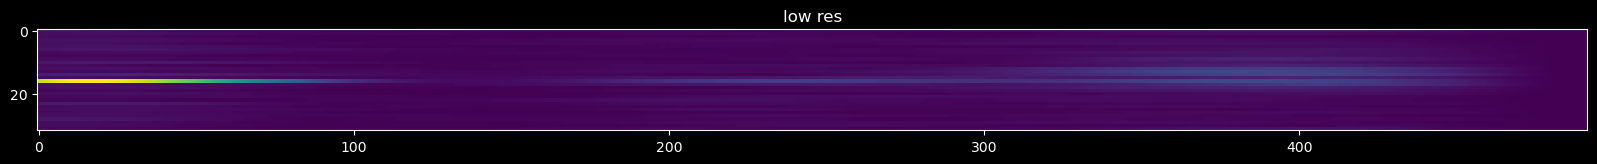

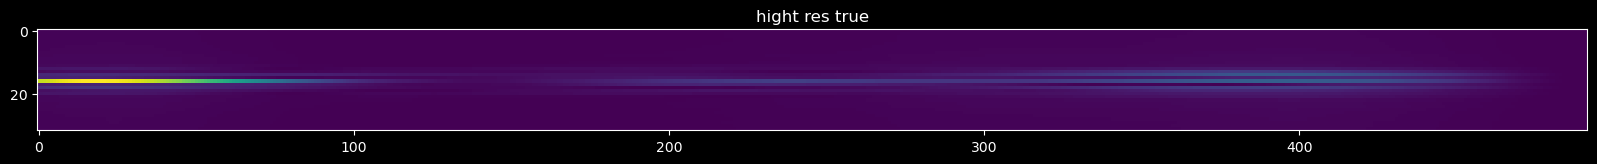

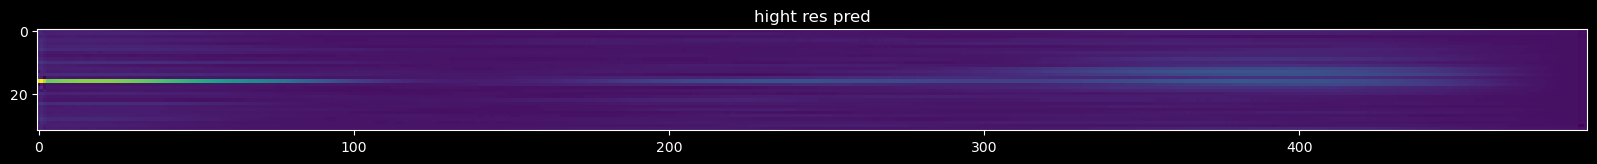

In [34]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
print(saved_model_dir_list[0].split("/")[-2])

saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[0], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

lr_0.001_batch_size_64_loss_sr_MSE_classifier_CrossEntropy
low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.1872634887695312 , 1.1318461894989014]


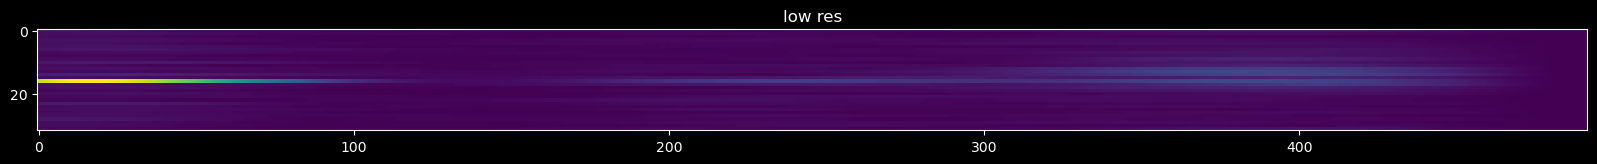

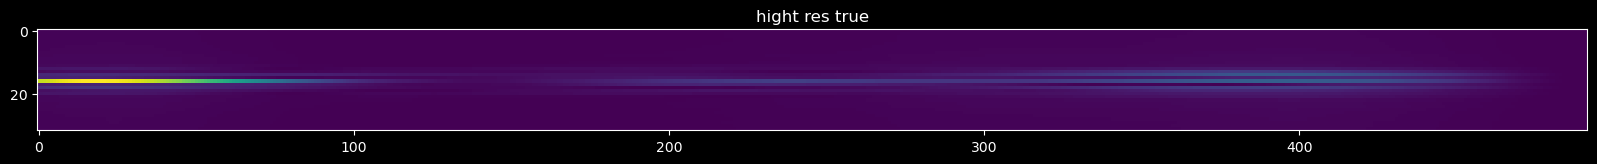

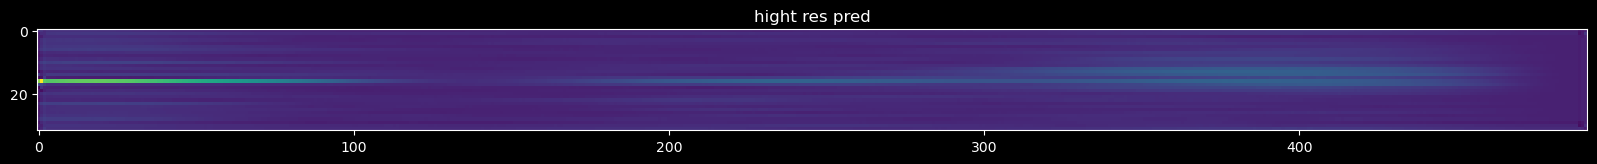

In [35]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
print(saved_model_dir_list[1].split("/")[-2])

saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[1], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy
low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.5604133605957031 , 1.652928113937378]


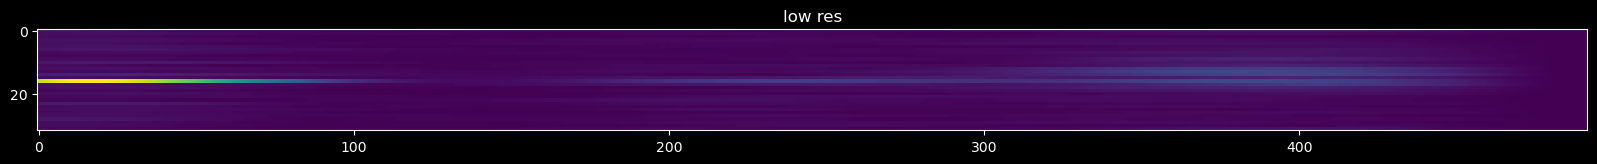

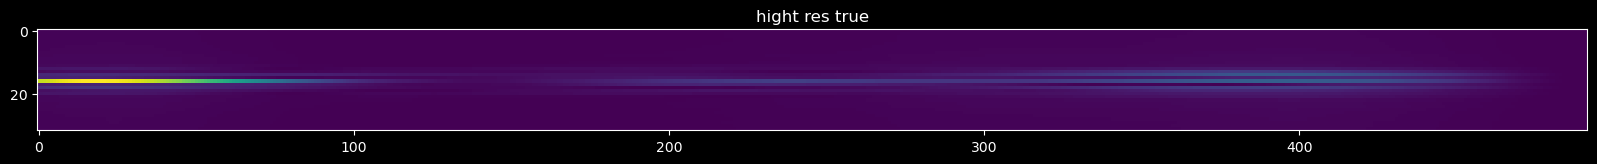

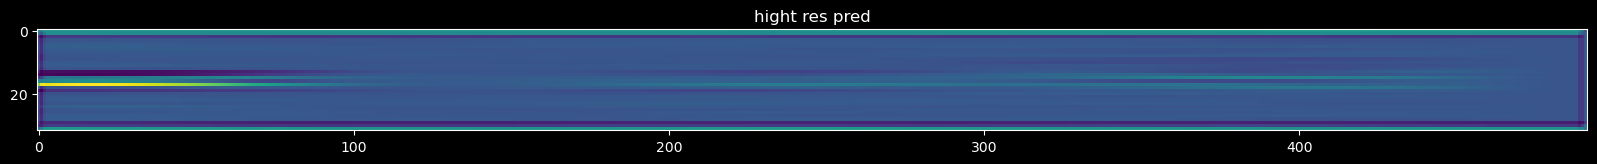

In [36]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
print(saved_model_dir_list[2].split("/")[-2])

saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[2], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy
low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-0.6503034830093384 , 2.1521496772766113]


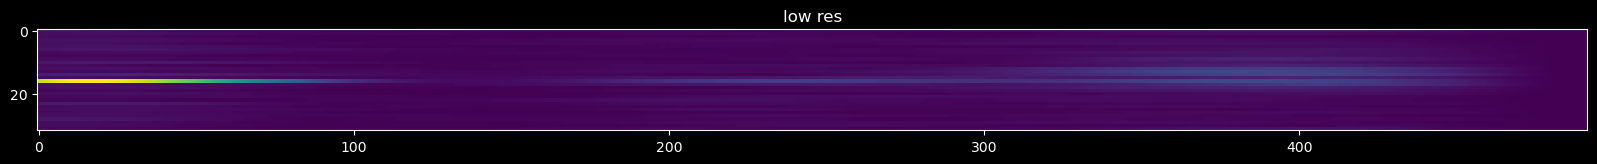

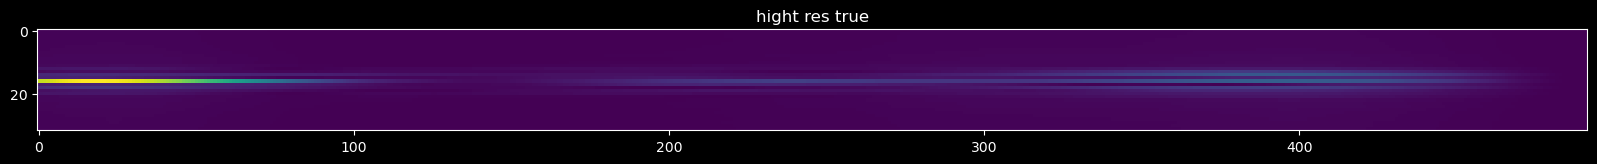

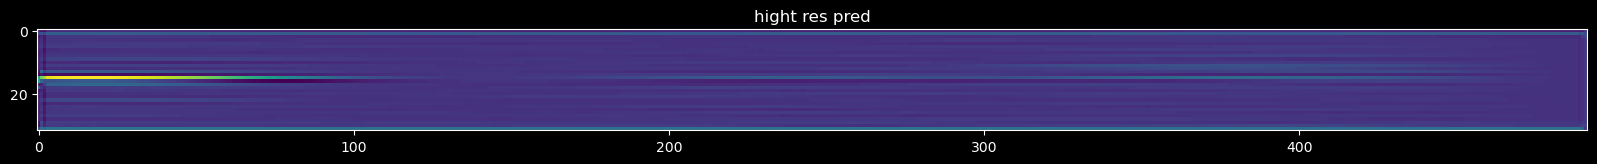

In [37]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
print(saved_model_dir_list[3].split("/")[-2])

saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[3], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy_w_sr_0_w_c_1
low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.4833426475524902 , 0.4911876916885376]


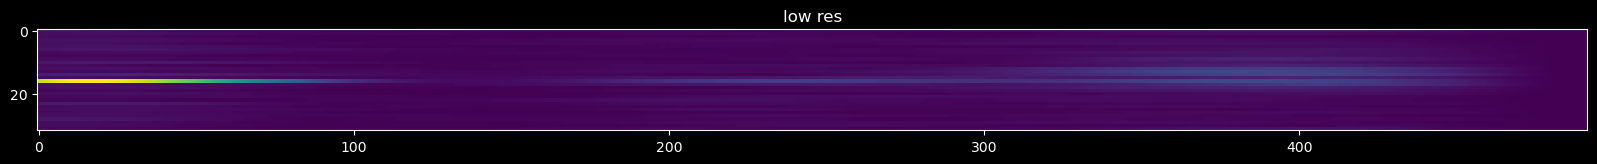

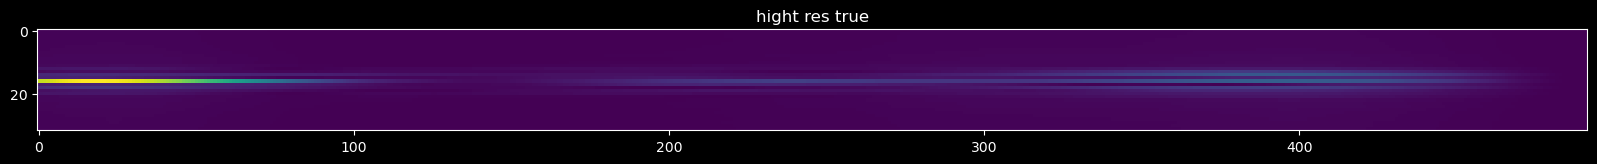

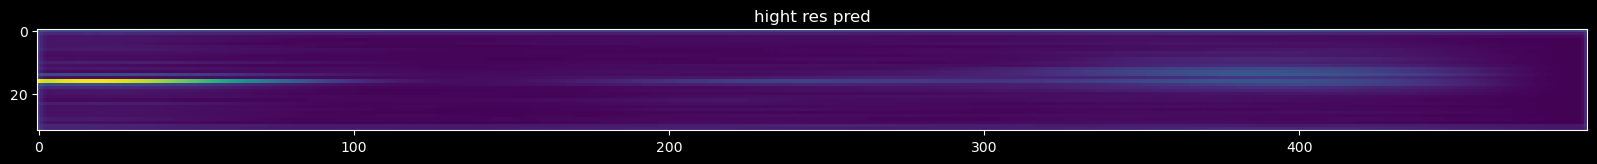

In [28]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
print(saved_model_dir_list[4].split("/")[-2])

model.load_state_dict(torch.load(saved_model_dir_list[4], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

lr_0.001_batch_size_64_loss_sr_MSE_classifier_CrossEntropy
low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-0.11261981725692749 , 2.220594882965088]


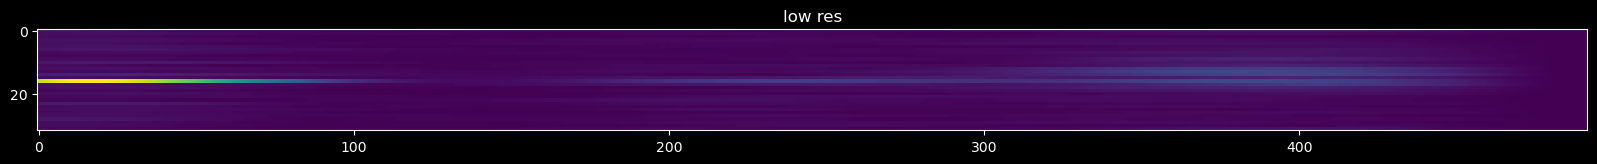

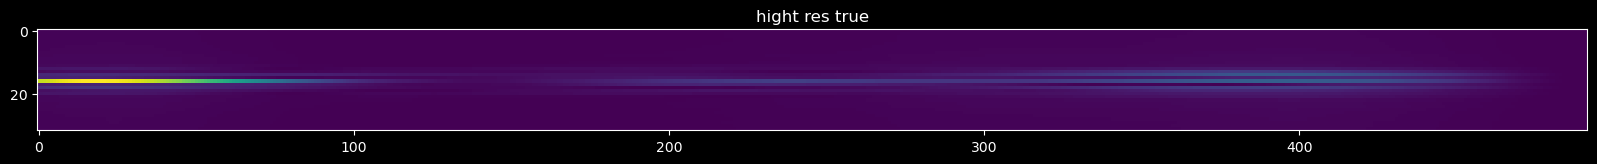

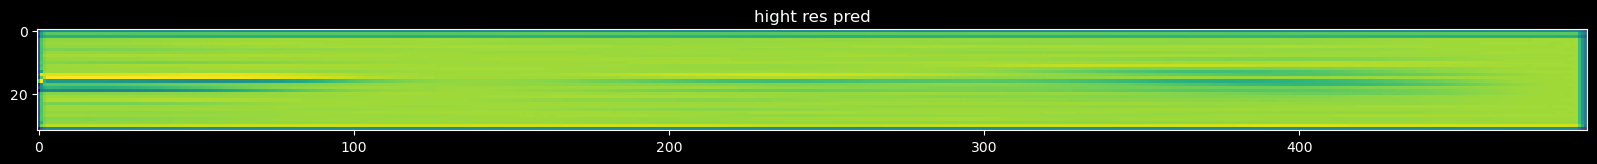

In [38]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
print(saved_model_dir_list[5].split("/")[-2])


saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[5], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

lr_0.001_batch_size_64_loss_sr_MSE_classifier_CrossEntropy
low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-0.8780670166015625 , 1.162684679031372]


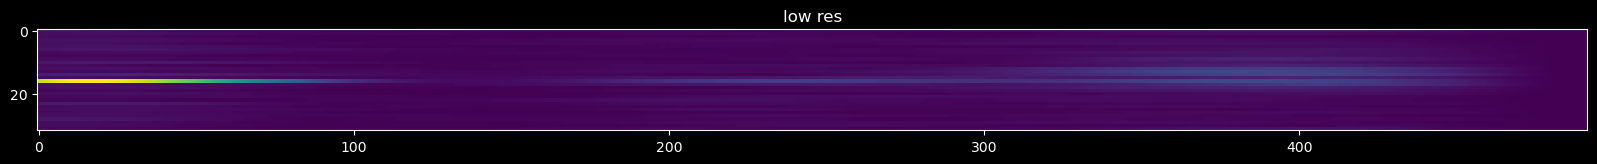

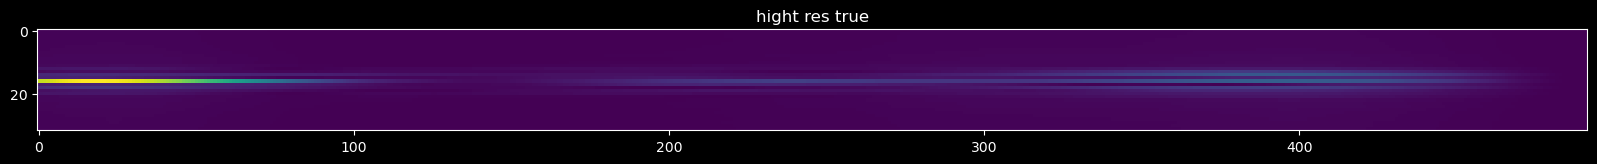

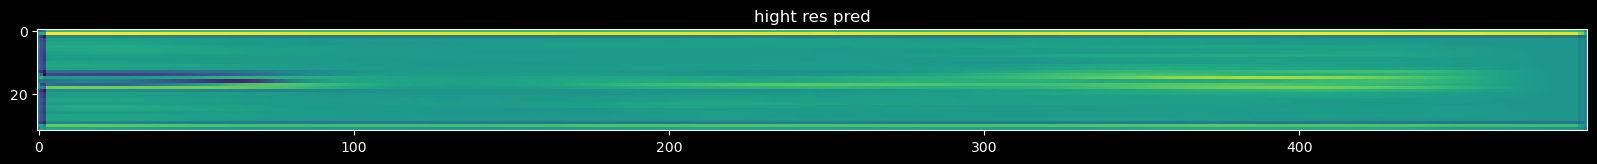

In [39]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(3,3),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
print(saved_model_dir_list[6].split("/")[-2])

saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[6], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

lr_0.001_batch_size_64_loss_sr_L1_classifier_CrossEntropy
low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.1970816850662231 , 1.1242742538452148]


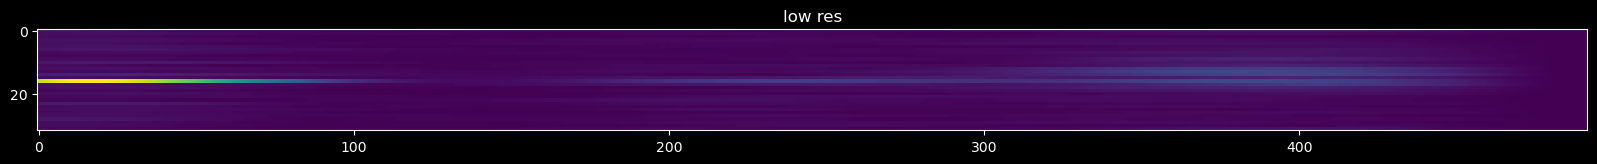

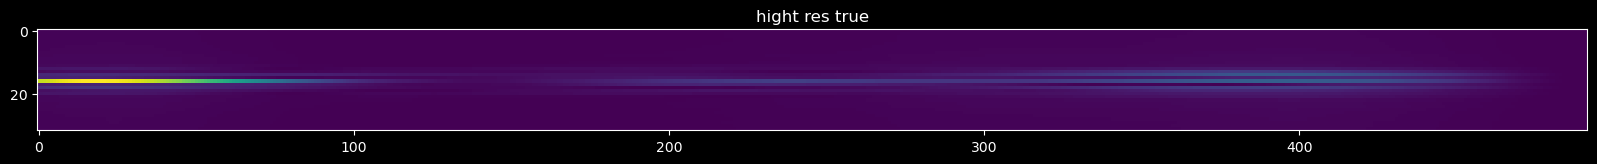

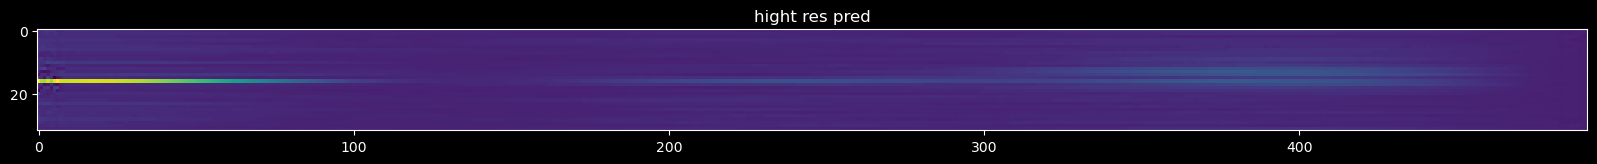

In [40]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(7,7),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
print(saved_model_dir_list[7].split("/")[-2])

saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[7], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

lr_0.001_batch_size_64_loss_sr_MSE_classifier_CrossEntropy
low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-2.0 , 0.0]


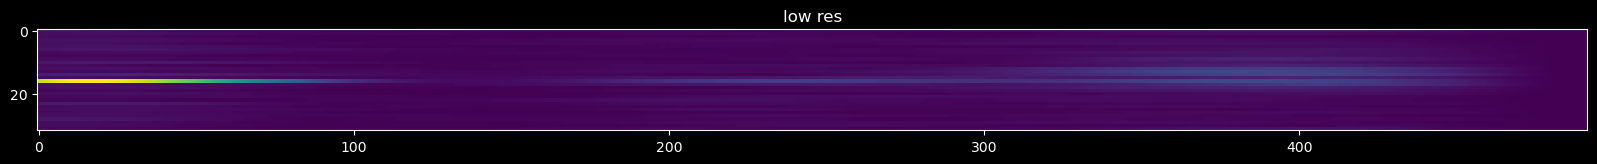

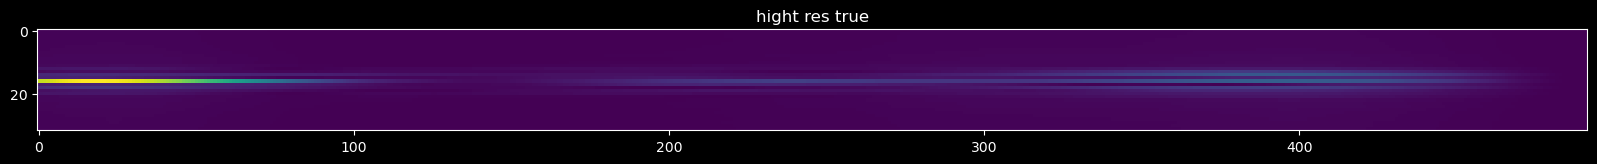

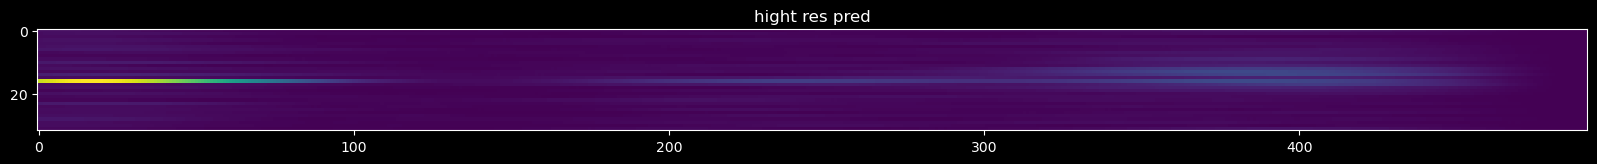

In [41]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(7,7),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
print(saved_model_dir_list[8].split("/")[-2])

saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[8], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.8804209232330322 , 0.030485153198242188]


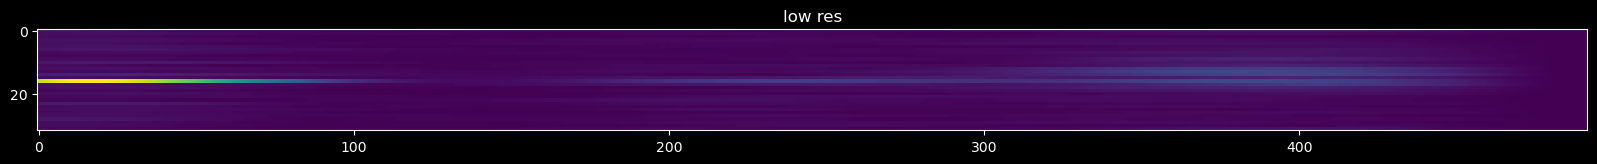

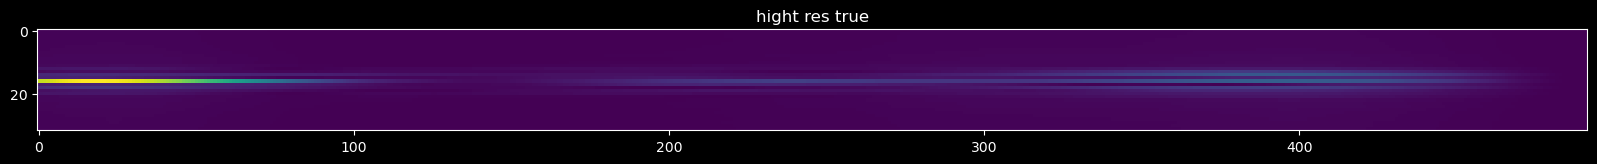

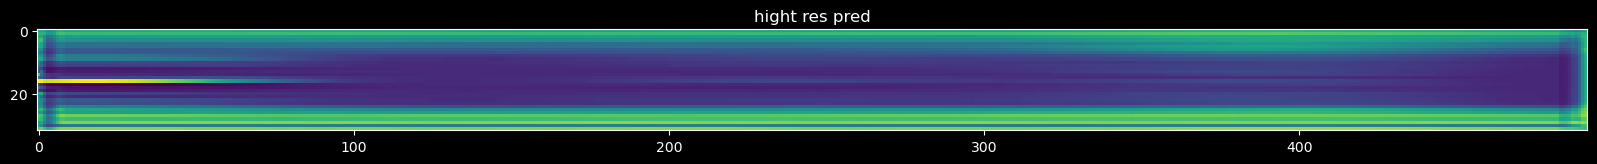

In [25]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(7,7),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[9], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")

low res pixel range: [-1.0 , 1.0]
hight res true pixel range: [-1.0 , 1.0]
hight res pred pixel range: [-1.9992766380310059 , 6.791070461273193]


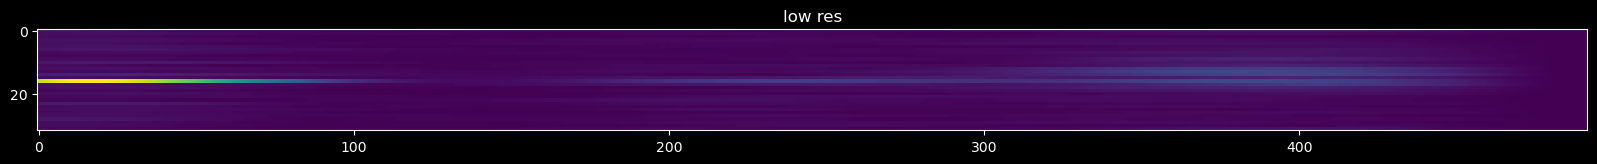

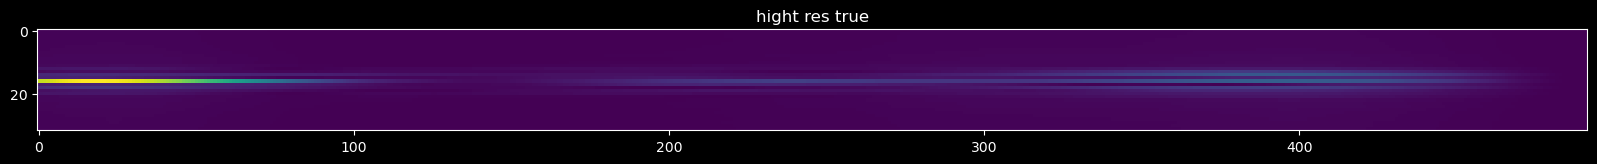

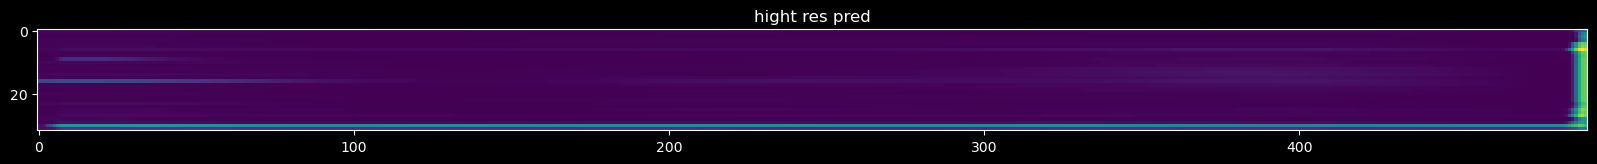

In [26]:
# L1 Loss, leaky relu pixel range -1,1 
srcnn = SRCnn(
    num_features_1=32,
    num_features_2=32,
    kernel_size=(7,7),
    activation="elu",
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
saved_model_dir = "/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/_4_col_4_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_-1_1_full_train_2conv/n_feat1_32_n_feat2_32_ksize_(3, 3)_activation_leaky_relu_loss_L1/time_2023-12-19_17:15:26/max_acc_model.pt"
model.load_state_dict(torch.load(saved_model_dir_list[10], map_location=torch.device('cpu')))
model.eval()
res = model(low_res_imgs)
res_imgs = res[0].detach().numpy()
low_res_img = low_res_imgs[0,0,0,:,:]
higit_res_img_true = hight_res_imgs[0,0,0,:,:]
higit_res_img_pred = res_imgs[0,0,0,:,:]
pixel_range(low_res_img, "low res")
pixel_range(higit_res_img_true, "hight res true")
pixel_range(higit_res_img_pred, "hight res pred")
plot_img(low_res_img, "low res")
plot_img(higit_res_img_true, "hight res true")
plot_img(higit_res_img_pred, "hight res pred")